In [22]:
import requests

from PIL import Image

from io import BytesIO

In [2]:
url = 'https://imdb-api.com/en/API/SearchMovie/k_iw50ohm9/'
search = 'inception'

In [21]:
def moviesearch(query):
    '''
    takes a query and returns {id,resulttype,image,title,description} for the first result from imdb search
    '''
    url = 'https://imdb-api.com/en/API/SearchMovie/k_iw50ohm9/'
    response = requests.get(url+query)
    if response.status_code == 200:
        firstresult = response.json()['results'][0]
        return firstresult
    else:
        return 'none'

In [16]:
def resizeimage(imagelink, size='384x528'):
    url = imagelink.replace('original', '384x528')
    return url

In [14]:
def poster(movieid):
    url = 'https://imdb-api.com/en/API/Posters/k_iw50ohm9/'
    response = requests.get(url+movieid)
    firstposter = response['posters'][0]
    link = firstposter['link']
    return link

#sometimes the moviesearch image is huge but the postersearch first image is smaller

In [1]:
def list_imdb_search(titlelist):
    resp = [imdb.moviesearch(title) for title in titlelist]
    cleanresp = [movie for movie in resp if movie != 'none']
    return cleanresp

In [2]:
def list_imdb_info(imdb_search_list):
    info = [imdb.moviedetails(movie['m_id']) for movie in imdb_search_list]
    for movie in info:
        movie['image']=movie['image'].replace('original', '384x528')
    return info

Response :200


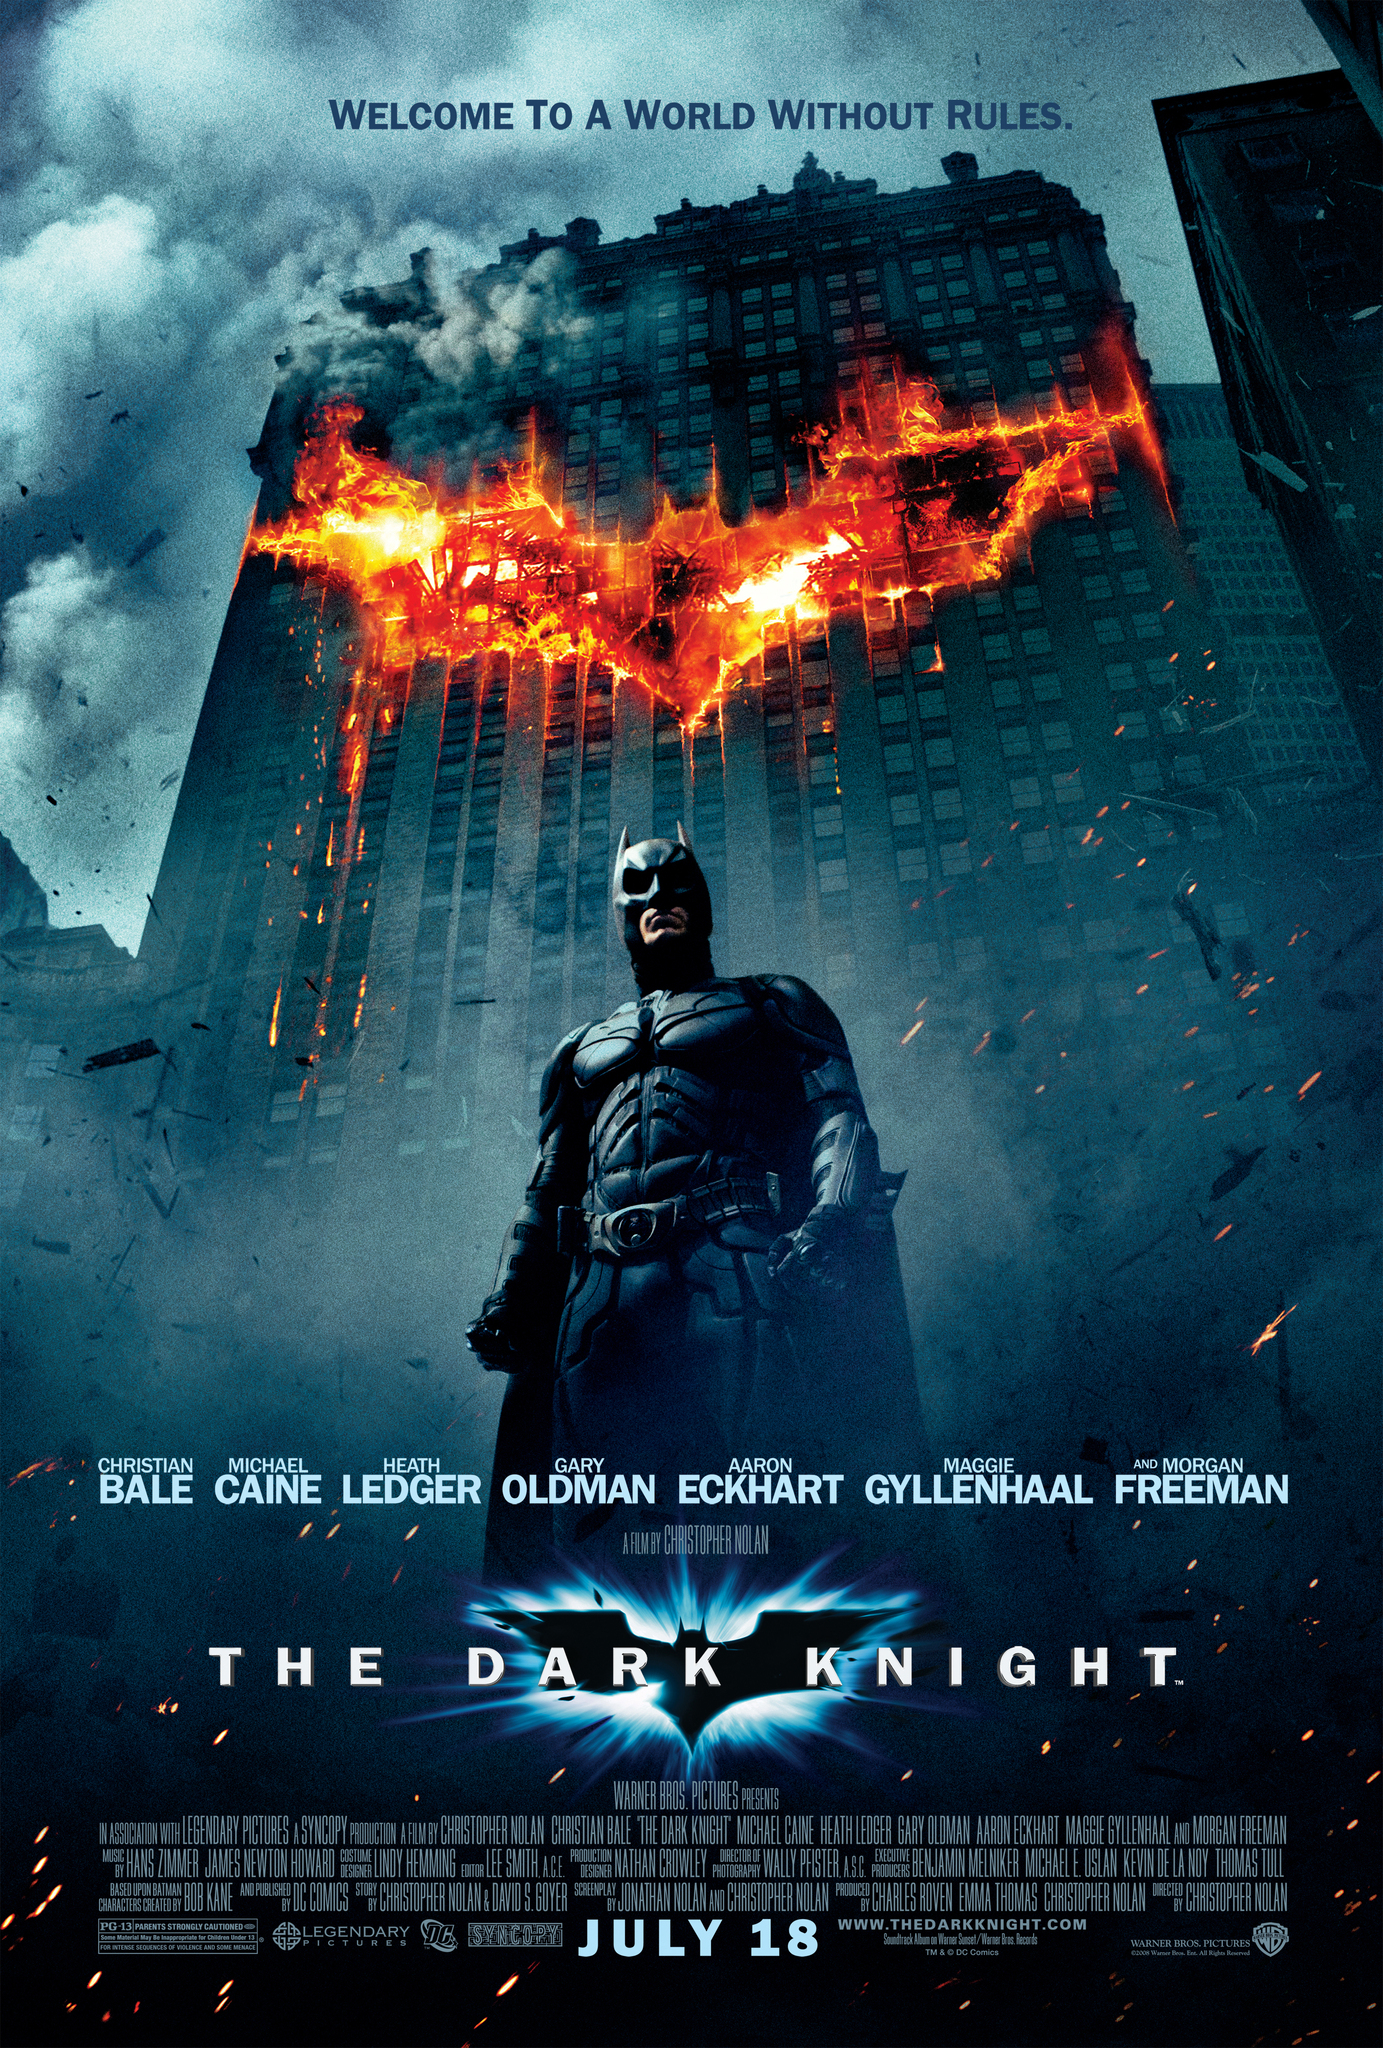

In [84]:
#my_header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:88.0) Gecko/20100101 Firefox/88.0'}

url = 'https://imdb-api.com/images/original/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_Ratio0.7273_AL_.jpg'

response = requests.get(url)
print(f"Response :{response.status_code}")
img = Image.open(BytesIO(response.content))
img

In [83]:
moviesearch('thedark knight')

{'id': 'tt0468569',
 'resultType': 'Title',
 'image': 'https://imdb-api.com/images/original/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_Ratio0.7273_AL_.jpg',
 'title': 'The Dark Knight',
 'description': '(2008)'}

In [ ]:
#returns id, title and year
#i want director, synopsis, runtime, some actors

In [86]:
url = 'https://imdb-api.com/en/API/Title/k_iw50ohm9/'
movieid = 'tt0468569'
response = requests.get(url + movieid)


<bound method Response.json of <Response [200]>>

In [89]:
moviedetails = response.json()

In [90]:
moviedetails.keys()

dict_keys(['id', 'title', 'originalTitle', 'fullTitle', 'type', 'year', 'image', 'releaseDate', 'runtimeMins', 'runtimeStr', 'plot', 'plotLocal', 'plotLocalIsRtl', 'awards', 'directors', 'directorList', 'writers', 'writerList', 'stars', 'starList', 'actorList', 'fullCast', 'genres', 'genreList', 'companies', 'companyList', 'countries', 'countryList', 'languages', 'languageList', 'contentRating', 'imDbRating', 'imDbRatingVotes', 'metacriticRating', 'ratings', 'wikipedia', 'posters', 'images', 'trailer', 'boxOffice', 'tagline', 'keywords', 'keywordList', 'similars', 'tvSeriesInfo', 'tvEpisodeInfo', 'errorMessage'])

In [120]:
for key in ['title', 'year',  'runtimeMins', 'runtimeStr', 'plot',  'directors', 'writers',  'stars',  'genres',  'companies',    'contentRating', 'imDbRating',  'metacriticRating']:
    print(f'{key} : {moviedetails[key]}')

title : The Dark Knight
year : 2008
runtimeMins : 152
runtimeStr : 2h 32min
plot : Set within a year after the events of Batman Begins (2005), Batman, Lieutenant James Gordon, and new District Attorney Harvey Dent successfully begin to round up the criminals that plague Gotham City, until a mysterious and sadistic criminal mastermind known only as "The Joker" appears in Gotham, creating a new wave of chaos. Batman's struggle against The Joker becomes deeply personal, forcing him to "confront everything he believes" and improve his technology to stop him. A love triangle develops between Bruce Wayne, Dent, and Rachel Dawes.
directors : Christopher Nolan
writers : Jonathan Nolan, Christopher Nolan, David S. Goyer
stars : Christian Bale, Heath Ledger, Aaron Eckhart
genres : Action, Crime, Drama
companies : Warner Bros., Legendary Entertainment, Syncopy
contentRating : PG-13
imDbRating : 9
metacriticRating : 84


In [148]:
print(f'{moviedetails["title"]} [{moviedetails["year"]}, {moviedetails["runtimeMins"]} minutes, {moviedetails["contentRating"]}]')
print('')
print(f'Director: {moviedetails["directors"]}')
print(f'Starring: {moviedetails["stars"]}')
print(f'Writers: {moviedetails["writers"]}')
print('')
print(f'IMDb: {moviedetails["imDbRating"]} | MetaScore: {moviedetails["metacriticRating"]} | LetterBoxd: x')
print('')
print(f'{moviedetails["genres"]} | {moviedetails["companies"]}')
print('')
print({moviedetails["plot"]})

The Dark Knight [2008, 152 minutes, PG-13]

Director: Christopher Nolan
Starring: Christian Bale, Heath Ledger, Aaron Eckhart
Writers: Jonathan Nolan, Christopher Nolan, David S. Goyer

IMDb: 9 | MetaScore: 84 | LetterBoxd: x

Action, Crime, Drama | Warner Bros., Legendary Entertainment, Syncopy

{'Set within a year after the events of Batman Begins (2005), Batman, Lieutenant James Gordon, and new District Attorney Harvey Dent successfully begin to round up the criminals that plague Gotham City, until a mysterious and sadistic criminal mastermind known only as "The Joker" appears in Gotham, creating a new wave of chaos. Batman\'s struggle against The Joker becomes deeply personal, forcing him to "confront everything he believes" and improve his technology to stop him. A love triangle develops between Bruce Wayne, Dent, and Rachel Dawes.'}


In [149]:
moviedetails['title']

'The Dark Knight'

In [42]:
def moviesearch(query):
    '''
    takes query, calls search api, returns first result which is a dict
    '''
    url = 'https://imdb-api.com/en/API/SearchMovie/k_iw50ohm9/'
    response = requests.get(url+query).json()
    print(f"Response :{response.status_code}")
    firstresult = response['results'][0]
    return firstresult

In [163]:
def moviedetails(movieid):
    '''
    takes id, calls details api, returns a dict of many details
    '''
    url = 'https://imdb-api.com/en/API/Title/k_iw50ohm9/'
    response = requests.get(url + movieid)
    print(f"Response :{response.status_code}")
    moviedetails = response.json()
    return moviedetails

In [151]:
result = moviesearch('her')
result

{'id': 'tt1798709',
 'resultType': 'Title',
 'image': 'https://imdb-api.com/images/original/MV5BMjA1Nzk0OTM2OF5BMl5BanBnXkFtZTgwNjU2NjEwMDE@._V1_Ratio0.7273_AL_.jpg',
 'title': 'Her',
 'description': '(2013)'}

In [155]:
deets = moviedetails(result['id'])
deets

Response :200


{'id': 'tt1798709',
 'title': 'Her',
 'originalTitle': '',
 'fullTitle': 'Her (2013)',
 'type': 'Movie',
 'year': '2013',
 'image': 'https://imdb-api.com/images/original/MV5BMjA1Nzk0OTM2OF5BMl5BanBnXkFtZTgwNjU2NjEwMDE@._V1_Ratio0.6751_AL_.jpg',
 'releaseDate': '2014-01-10',
 'runtimeMins': '126',
 'runtimeStr': '2h 6min',
 'plot': 'Theodore is a lonely man in the final stages of his divorce. When he\'s not working as a letter writer, his down time is spent playing video games and occasionally hanging out with friends. He decides to purchase the new OS1, which is advertised as the world\'s first artificially intelligent operating system, "It\'s not just an operating system, it\'s a consciousness," the ad states. Theodore quickly finds himself drawn in with Samantha, the voice behind his OS1. As they start spending time together they grow closer and closer and eventually find themselves in love. Having fallen in love with his OS, Theodore finds himself dealing with feelings of both great

In [158]:
moviedetails=deets
print(f'{moviedetails["title"]} [{moviedetails["year"]}, {moviedetails["runtimeMins"]} minutes, {moviedetails["contentRating"]}]')
print('')
print(f'Director: {moviedetails["directors"]}')
print(f'Starring: {moviedetails["stars"]}')
print(f'Writers: {moviedetails["writers"]}')
print('')
print(f'IMDb: {moviedetails["imDbRating"]} | MetaScore: {moviedetails["metacriticRating"]} | LetterBoxd: x')
print('')
print(f'{moviedetails["genres"]} | {moviedetails["companies"]}')
print('')
print(f'{moviedetails["plot"]}')

Her [2013, 126 minutes, R]

Director: Spike Jonze
Starring: Joaquin Phoenix, Amy Adams, Scarlett Johansson
Writers: Spike Jonze

IMDb: 8 | MetaScore: 91 | LetterBoxd: x

Drama, Romance, Sci-Fi | Annapurna Pictures, Stage 6 Films

Theodore is a lonely man in the final stages of his divorce. When he's not working as a letter writer, his down time is spent playing video games and occasionally hanging out with friends. He decides to purchase the new OS1, which is advertised as the world's first artificially intelligent operating system, "It's not just an operating system, it's a consciousness," the ad states. Theodore quickly finds himself drawn in with Samantha, the voice behind his OS1. As they start spending time together they grow closer and closer and eventually find themselves in love. Having fallen in love with his OS, Theodore finds himself dealing with feelings of both great joy and doubt. As an OS, Samantha has powerful intelligence that she uses to help Theodore in ways others h

In [157]:
moviedetails['plot']

'Theodore is a lonely man in the final stages of his divorce. When he\'s not working as a letter writer, his down time is spent playing video games and occasionally hanging out with friends. He decides to purchase the new OS1, which is advertised as the world\'s first artificially intelligent operating system, "It\'s not just an operating system, it\'s a consciousness," the ad states. Theodore quickly finds himself drawn in with Samantha, the voice behind his OS1. As they start spending time together they grow closer and closer and eventually find themselves in love. Having fallen in love with his OS, Theodore finds himself dealing with feelings of both great joy and doubt. As an OS, Samantha has powerful intelligence that she uses to help Theodore in ways others hadn\'t, but how does she help him deal with his inner conflict of being in love with an OS?'